# 03 Vanilla Policy Gradient with rewards as weights

#### 👉🏽 The policy network will have the following architecture:

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_lunar_lander/images/policy_network.svg?raw=True" width="300"/>

#### 👉🏽 And we will use the rewards to compute the weights in the policy gradient formula.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🚀🌙

In [20]:
import gym
env = gym.make('LunarLander-v2', render_mode='rgb_array')
ENV_NAME = 'LunarLander-v2'

## Create agent and set hyperparameters

In [3]:
from vpg_agent import VPGAgent

agent = VPGAgent(
    env_name=ENV_NAME,
    learning_rate=3e-3,
    hidden_layers=[16, 16],
    gradient_weights='rewards',
)

Policy network with 484 parameters
Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=4, bias=True)
)


## Tensorboard logger to see training metrics

In [4]:
from utils import get_agent_id
agent_id = get_agent_id(ENV_NAME)
print(f'agent_id = {agent_id}')

# tensorboard logger to see training curves
from utils import get_logger, get_model_path
logger = get_logger(env_name=ENV_NAME, agent_id=agent_id)

# path to save policy network weights and hyperparameters
model_path = get_model_path(env_name=ENV_NAME, agent_id=agent_id)

agent_id = 0


## Training 🏋️

In [49]:
agent.train(
    n_policy_updates=5000,
    batch_size=256,
    logger=logger,
    model_path=model_path,
)

Training:   0%|          | 11/5000 [00:06<1:34:17,  1.13s/epoch, epoch:  10 	 loss: -98.524 	 reward: -84.657                                    ]

New best model! Average reward = -104.61, Success rate = 0.00%


Training:   0%|          | 20/5000 [00:12<2:11:57,  1.59s/epoch, epoch:  20 	 loss: -101.392 	 reward: -87.458                                   ]

New best model! Average reward = -102.53, Success rate = 0.00%


Training:   1%|          | 40/5000 [00:26<2:24:17,  1.75s/epoch, epoch:  40 	 loss: -103.079 	 reward: -83.330                                   ]

New best model! Average reward = -100.08, Success rate = 0.00%


Training:   1%|          | 50/5000 [00:33<2:26:50,  1.78s/epoch, epoch:  49 	 loss: -124.603 	 reward: -98.335                                   ]

New best model! Average reward = -99.61, Success rate = 0.00%


Training:   1%|          | 60/5000 [00:42<2:45:46,  2.01s/epoch, epoch:  59 	 loss: -130.564 	 reward: -114.402                                  ]

New best model! Average reward = -98.29, Success rate = 0.00%


Training:   4%|▍         | 220/5000 [03:01<3:26:22,  2.59s/epoch, epoch: 219 	 loss: -120.364 	 reward: -93.500                                   ]

New best model! Average reward = -92.79, Success rate = 0.00%


Training:   5%|▌         | 260/5000 [03:47<3:47:04,  2.87s/epoch, epoch: 259 	 loss: -112.971 	 reward: -84.450                                   ]

New best model! Average reward = -89.10, Success rate = 0.00%


Training:   5%|▌         | 270/5000 [04:04<6:04:52,  4.63s/epoch, epoch: 269 	 loss: -131.935 	 reward: -101.778                                  ]

New best model! Average reward = -87.73, Success rate = 0.00%


Training:   6%|▌         | 300/5000 [04:48<4:33:58,  3.50s/epoch, epoch: 299 	 loss: -127.494 	 reward: -103.871                                  ]

New best model! Average reward = -86.18, Success rate = 0.00%


Training:   6%|▋         | 320/5000 [05:15<4:14:54,  3.27s/epoch, epoch: 319 	 loss: -124.353 	 reward: -96.858                                   ]

New best model! Average reward = -83.38, Success rate = 0.00%


Training:   7%|▋         | 330/5000 [05:27<3:38:52,  2.81s/epoch, epoch: 329 	 loss: -106.714 	 reward: -81.186                                   ]

New best model! Average reward = -81.32, Success rate = 0.00%


Training:   7%|▋         | 340/5000 [05:39<3:39:59,  2.83s/epoch, epoch: 339 	 loss: -97.350 	 reward: -73.687                                    ]

New best model! Average reward = -73.56, Success rate = 0.00%


Training:   7%|▋         | 350/5000 [05:51<4:07:56,  3.20s/epoch, epoch: 349 	 loss: -95.308 	 reward: -76.445                                    ]

New best model! Average reward = -73.23, Success rate = 0.00%


Training:   7%|▋         | 370/5000 [06:23<4:25:01,  3.43s/epoch, epoch: 369 	 loss: -100.841 	 reward: -80.276                                   ]

New best model! Average reward = -71.12, Success rate = 0.00%


Training:   8%|▊         | 400/5000 [07:04<4:44:46,  3.71s/epoch, epoch: 399 	 loss: -107.281 	 reward: -85.347                                   ]

New best model! Average reward = -65.16, Success rate = 0.00%


Training:   8%|▊         | 410/5000 [07:20<5:07:12,  4.02s/epoch, epoch: 409 	 loss: -75.266 	 reward: -54.997                                    ]

New best model! Average reward = -55.89, Success rate = 0.00%


Training:   8%|▊         | 420/5000 [07:36<5:03:20,  3.97s/epoch, epoch: 419 	 loss: -111.207 	 reward: -75.366                                   ]

New best model! Average reward = -55.67, Success rate = 0.00%


Training:   9%|▊         | 430/5000 [07:56<6:37:24,  5.22s/epoch, epoch: 429 	 loss: 14.188 	 reward: 4.871                                       ]

New best model! Average reward = -37.30, Success rate = 0.00%


Training:   9%|▉         | 440/5000 [08:16<6:40:37,  5.27s/epoch, epoch: 439 	 loss: -89.803 	 reward: -69.233                                    ]

New best model! Average reward = -35.20, Success rate = 0.00%


Training:   9%|▉         | 450/5000 [08:48<10:36:45,  8.40s/epoch, epoch: 449 	 loss: -32.807 	 reward: -30.941                                    ]

New best model! Average reward = -33.60, Success rate = 2.00%


Training:   9%|▉         | 470/5000 [10:02<14:18:56, 11.38s/epoch, epoch: 469 	 loss: -34.124 	 reward: -37.581                                    ]

New best model! Average reward = -31.04, Success rate = 1.00%


Training:  12%|█▏        | 580/5000 [17:37<10:12:15,  8.31s/epoch, epoch: 579 	 loss: -44.844 	 reward: -31.765                                    ]

New best model! Average reward = -23.23, Success rate = 5.00%


Training:  12%|█▏        | 620/5000 [21:32<14:36:23, 12.01s/epoch, epoch: 619 	 loss: -20.652 	 reward: -5.914                                     ]

New best model! Average reward = -20.93, Success rate = 5.00%


Training:  13%|█▎        | 630/5000 [22:04<10:46:24,  8.88s/epoch, epoch: 629 	 loss: -230.763 	 reward: -134.326                                  ]

New best model! Average reward = -17.84, Success rate = 4.00%


Training:  13%|█▎        | 651/5000 [22:40<4:27:03,  3.68s/epoch, epoch: 650 	 loss: 18.560 	 reward: 5.045                                       ] 

New best model! Average reward = -14.10, Success rate = 2.00%


Training:  14%|█▎        | 680/5000 [24:16<7:26:15,  6.20s/epoch, epoch: 680 	 loss: -11.033 	 reward: -11.663                                    ] 

New best model! Average reward = -9.66, Success rate = 3.00%


Training:  14%|█▍        | 720/5000 [28:04<13:09:18, 11.07s/epoch, epoch: 719 	 loss: -41.760 	 reward: -36.649                                    ]

New best model! Average reward = -7.59, Success rate = 7.00%


Training:  15%|█▍        | 730/5000 [28:42<11:24:01,  9.61s/epoch, epoch: 729 	 loss: 41.729 	 reward: 29.557                                      ]

New best model! Average reward = -4.26, Success rate = 2.00%


Training:  15%|█▌        | 771/5000 [30:40<7:14:33,  6.17s/epoch, epoch: 770 	 loss: -35.993 	 reward: -29.992                                    ] 

New best model! Average reward = -3.35, Success rate = 4.00%


Training:  16%|█▋        | 820/5000 [34:26<11:08:35,  9.60s/epoch, epoch: 819 	 loss: 11.870 	 reward: 10.212                                      ]

New best model! Average reward = -0.35, Success rate = 7.00%


Training:  18%|█▊        | 889/5000 [40:37<1:22:07,  1.20s/epoch, epoch: 889 	 loss: 20.980 	 reward: 11.402                                      ] Exception ignored in: <function tqdm.__del__ at 0x00000145AB3D1990>
Traceback (most recent call last):
  File "c:\Users\Ploita\anaconda3\envs\HandsOnRL\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\Ploita\anaconda3\envs\HandsOnRL\lib\site-packages\tqdm\std.py", line 1278, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'
Training:  19%|█▉        | 950/5000 [44:58<12:51:07, 11.42s/epoch, epoch: 949 	 loss: 9.159 	 reward: 9.392                                        ]

New best model! Average reward = 5.62, Success rate = 12.00%


Training:  21%|██▏       | 1070/5000 [55:45<9:59:12,  9.15s/epoch, epoch: 1069 	 loss: 18.005 	 reward: 15.573                                     ] 

New best model! Average reward = 10.47, Success rate = 7.00%


Training:  29%|██▉       | 1440/5000 [1:22:45<12:50:44, 12.99s/epoch, epoch: 1439 	 loss: 12.480 	 reward: 10.970                                     ]

New best model! Average reward = 11.57, Success rate = 6.00%


Training:  30%|██▉       | 1491/5000 [1:25:12<6:38:51,  6.82s/epoch, epoch: 1490 	 loss: 31.562 	 reward: 27.499                                     ] 

New best model! Average reward = 14.49, Success rate = 4.00%


Training:  30%|███       | 1500/5000 [1:25:59<11:59:37, 12.34s/epoch, epoch: 1499 	 loss: 4.522 	 reward: 3.444                                       ]

New best model! Average reward = 20.53, Success rate = 8.00%


Training:  32%|███▏      | 1600/5000 [1:33:41<12:31:01, 13.25s/epoch, epoch: 1599 	 loss: 19.587 	 reward: 21.771                                     ]

New best model! Average reward = 26.22, Success rate = 10.00%


Training:  39%|███▊      | 1930/5000 [2:06:01<16:05:46, 18.88s/epoch, epoch: 1929 	 loss: 22.939 	 reward: 17.921                                     ]

New best model! Average reward = 27.44, Success rate = 12.00%


Training:  39%|███▉      | 1940/5000 [2:07:33<21:28:52, 25.27s/epoch, epoch: 1939 	 loss: 50.033 	 reward: 45.656                                     ]

New best model! Average reward = 28.25, Success rate = 18.00%


Training:  42%|████▏     | 2090/5000 [2:26:12<7:19:11,  9.06s/epoch, epoch: 2089 	 loss: 29.096 	 reward: 24.776                                     ] 

New best model! Average reward = 30.19, Success rate = 4.00%


Training:  43%|████▎     | 2150/5000 [2:30:30<10:48:02, 13.64s/epoch, epoch: 2149 	 loss: 31.112 	 reward: 26.431                                     ]

New best model! Average reward = 33.26, Success rate = 8.00%


Training:  47%|████▋     | 2330/5000 [3:03:58<10:41:13, 14.41s/epoch, epoch: 2329 	 loss: 21.664 	 reward: 16.599                                     ]

New best model! Average reward = 35.58, Success rate = 12.00%


Training:  62%|██████▏   | 3090/5000 [5:50:56<13:40:49, 25.79s/epoch, epoch: 3089 	 loss: 36.471 	 reward: 36.007                                     ]  

New best model! Average reward = 36.65, Success rate = 20.00%


Training:  64%|██████▍   | 3190/5000 [6:01:41<10:37:33, 21.13s/epoch, epoch: 3189 	 loss: 141.060 	 reward: 202.048                                   ]

New best model! Average reward = 51.19, Success rate = 41.00%


Training:  64%|██████▍   | 3200/5000 [6:02:16<4:37:12,  9.24s/epoch, epoch: 3199 	 loss: -110.594 	 reward: -150.454                                 ] 

New best model! Average reward = 65.17, Success rate = 22.00%


Training:  70%|██████▉   | 3480/5000 [6:59:47<8:42:27, 20.62s/epoch, epoch: 3479 	 loss: 105.054 	 reward: 159.632                                   ] 

New best model! Average reward = 67.70, Success rate = 38.00%


Training:  70%|███████   | 3500/5000 [7:01:21<4:18:57, 10.36s/epoch, epoch: 3499 	 loss: 39.785 	 reward: 47.237                                     ]

New best model! Average reward = 72.27, Success rate = 24.00%


Training:  70%|███████   | 3520/5000 [7:03:11<8:31:10, 20.72s/epoch, epoch: 3519 	 loss: -119.241 	 reward: -202.411                                 ]

New best model! Average reward = 134.00, Success rate = 63.00%


Training:  81%|████████  | 4030/5000 [7:59:26<2:52:20, 10.66s/epoch, epoch: 4029 	 loss: 178.655 	 reward: 251.749                                   ] 

New best model! Average reward = 211.58, Success rate = 79.00%


Training:  83%|████████▎ | 4150/5000 [8:30:22<4:18:02, 18.21s/epoch, epoch: 4149 	 loss: 166.542 	 reward: 200.268                                   ] 

New best model! Average reward = 216.57, Success rate = 88.00%


Training:  83%|████████▎ | 4170/5000 [8:31:33<2:32:17, 11.01s/epoch, epoch: 4169 	 loss: 196.614 	 reward: 248.731                                   ]

New best model! Average reward = 229.10, Success rate = 88.00%


Training:  87%|████████▋ | 4350/5000 [8:56:11<2:02:48, 11.34s/epoch, epoch: 4349 	 loss: 240.937 	 reward: 272.278                                   ]

New best model! Average reward = 233.38, Success rate = 95.00%


Training:  88%|████████▊ | 4390/5000 [9:00:43<2:12:54, 13.07s/epoch, epoch: 4389 	 loss: 195.572 	 reward: 202.807                                   ]

New best model! Average reward = 237.76, Success rate = 97.00%


Training:  88%|████████▊ | 4400/5000 [9:01:35<2:28:54, 14.89s/epoch, epoch: 4399 	 loss: 198.180 	 reward: 238.623                                   ]

New best model! Average reward = 240.05, Success rate = 98.00%


Training:  90%|████████▉ | 4490/5000 [9:08:43<1:37:47, 11.51s/epoch, epoch: 4489 	 loss: 229.177 	 reward: 286.776                                   ]

New best model! Average reward = 241.58, Success rate = 96.00%


Training:  94%|█████████▎| 4680/5000 [9:21:42<1:05:59, 12.37s/epoch, epoch: 4679 	 loss: 206.700 	 reward: 266.330                                   ]

New best model! Average reward = 247.67, Success rate = 98.00%


Training:  94%|█████████▍| 4710/5000 [9:24:09<54:38, 11.30s/epoch, epoch: 4709 	 loss: 203.927 	 reward: 250.814                                   ]  

New best model! Average reward = 249.98, Success rate = 96.00%


Training: 100%|██████████| 5000/5000 [9:34:18<00:00,  6.89s/epoch, epoch: 4999 	 loss: 214.953 	 reward: 279.433                                   ]


## Evaluate the agent ⏱️

In [50]:
rewards, success = agent.evaluate(n_episodes=100)

### Average reward

In [51]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

success_rate = np.array(success).mean()
print(f'Succes rate = {success_rate:.2%}')

Reward average 234.66, std 74.89
Succes rate = 87.00%


## Reward distribution

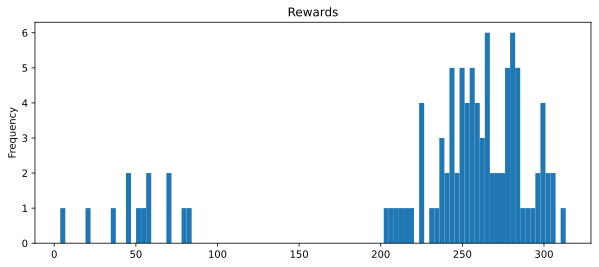

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

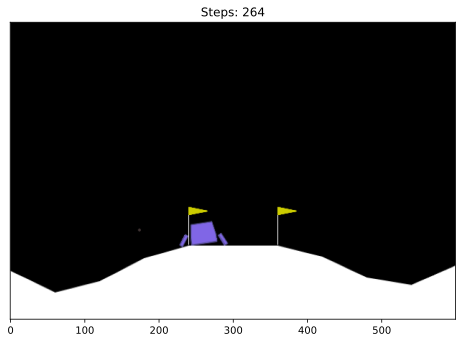

In [54]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)